In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import xgboost as xgb
import numpy as np
import shap

In [3]:
#Load data
cc = pd.read_csv('https://raw.githubusercontent.com/lucasweyrich958/Credit_Card_Spending/refs/heads/main/Customer_Data.csv')

cc.info()

# Summary of the dataset
cc.info()

# Descriptive statistics
cc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


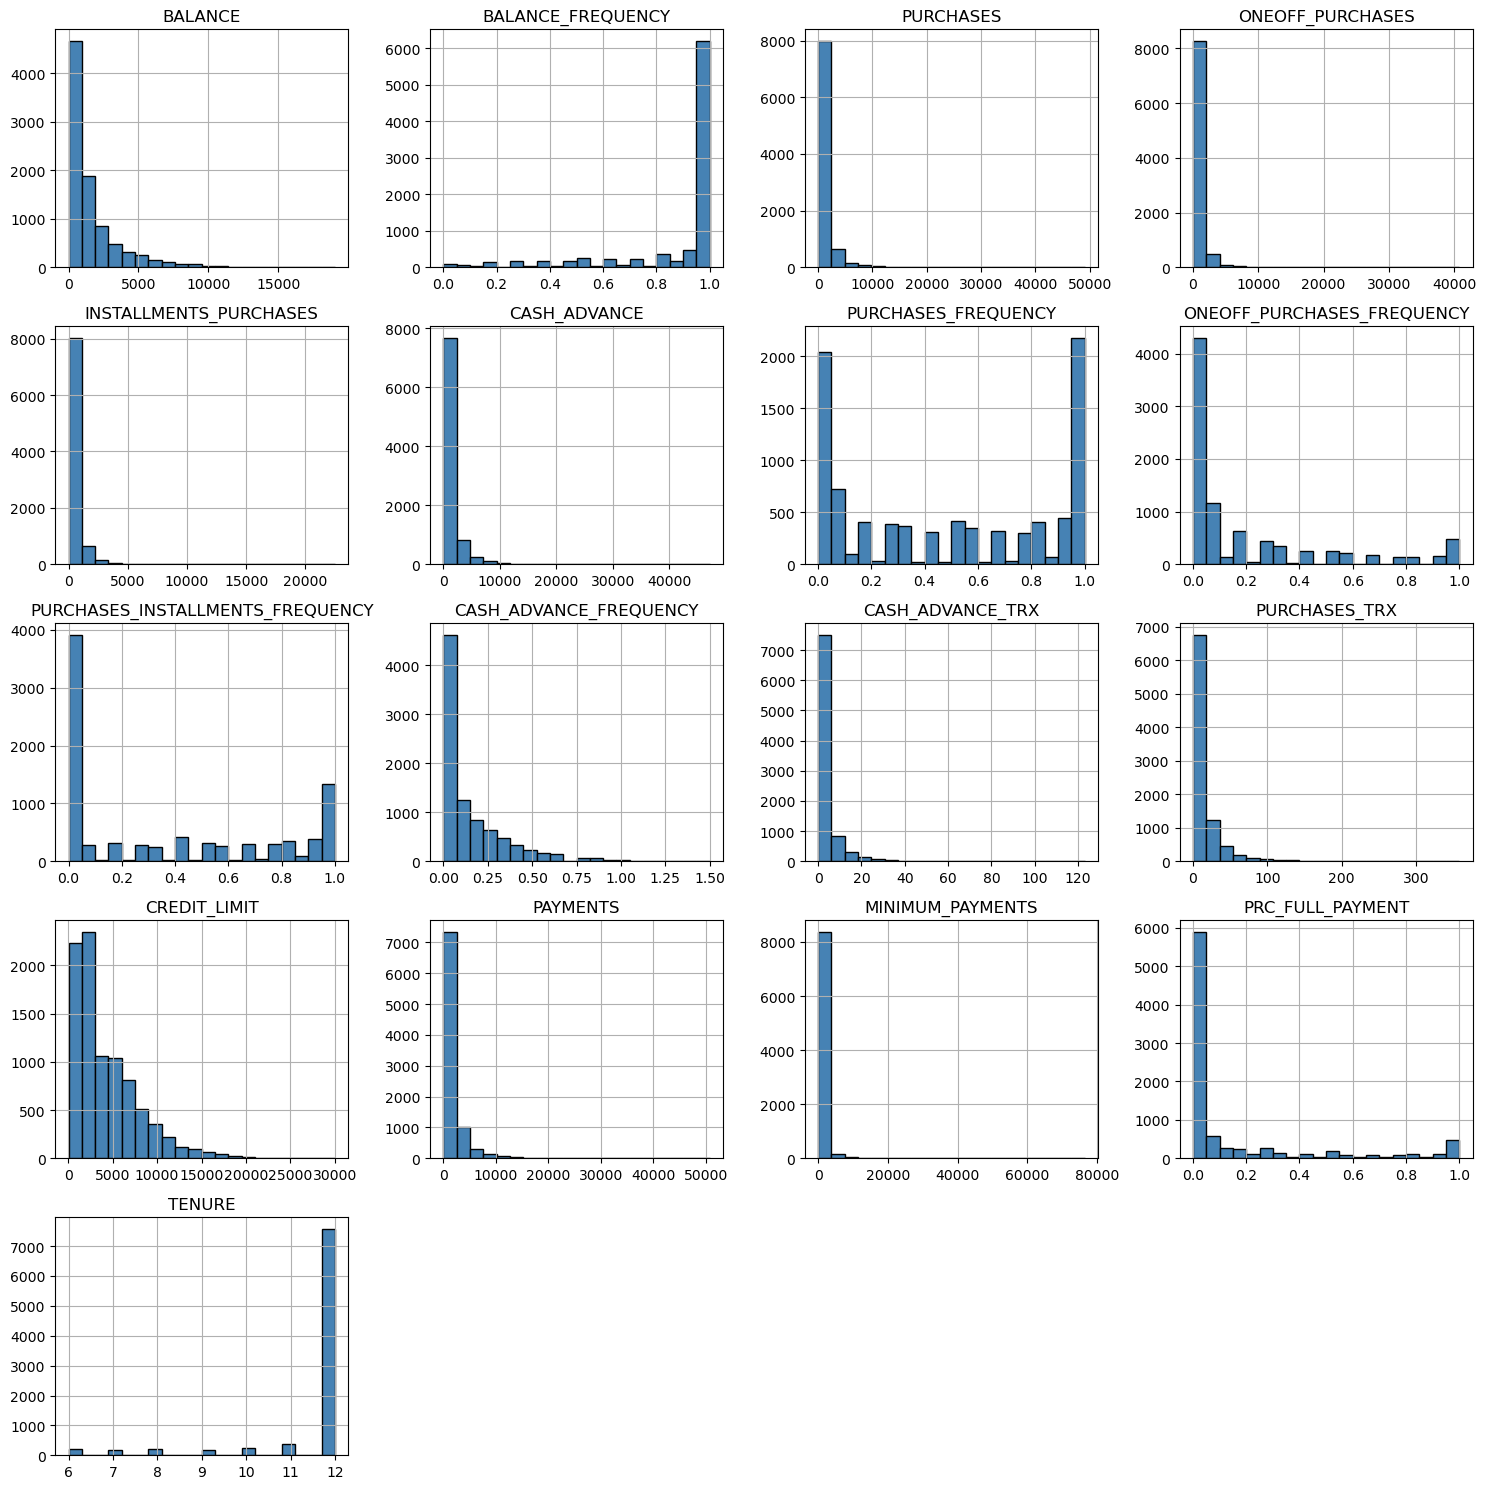

In [5]:
cc.hist(figsize=(15, 15), bins=20, color='steelblue', edgecolor='black')

plt.tight_layout()
plt.show()

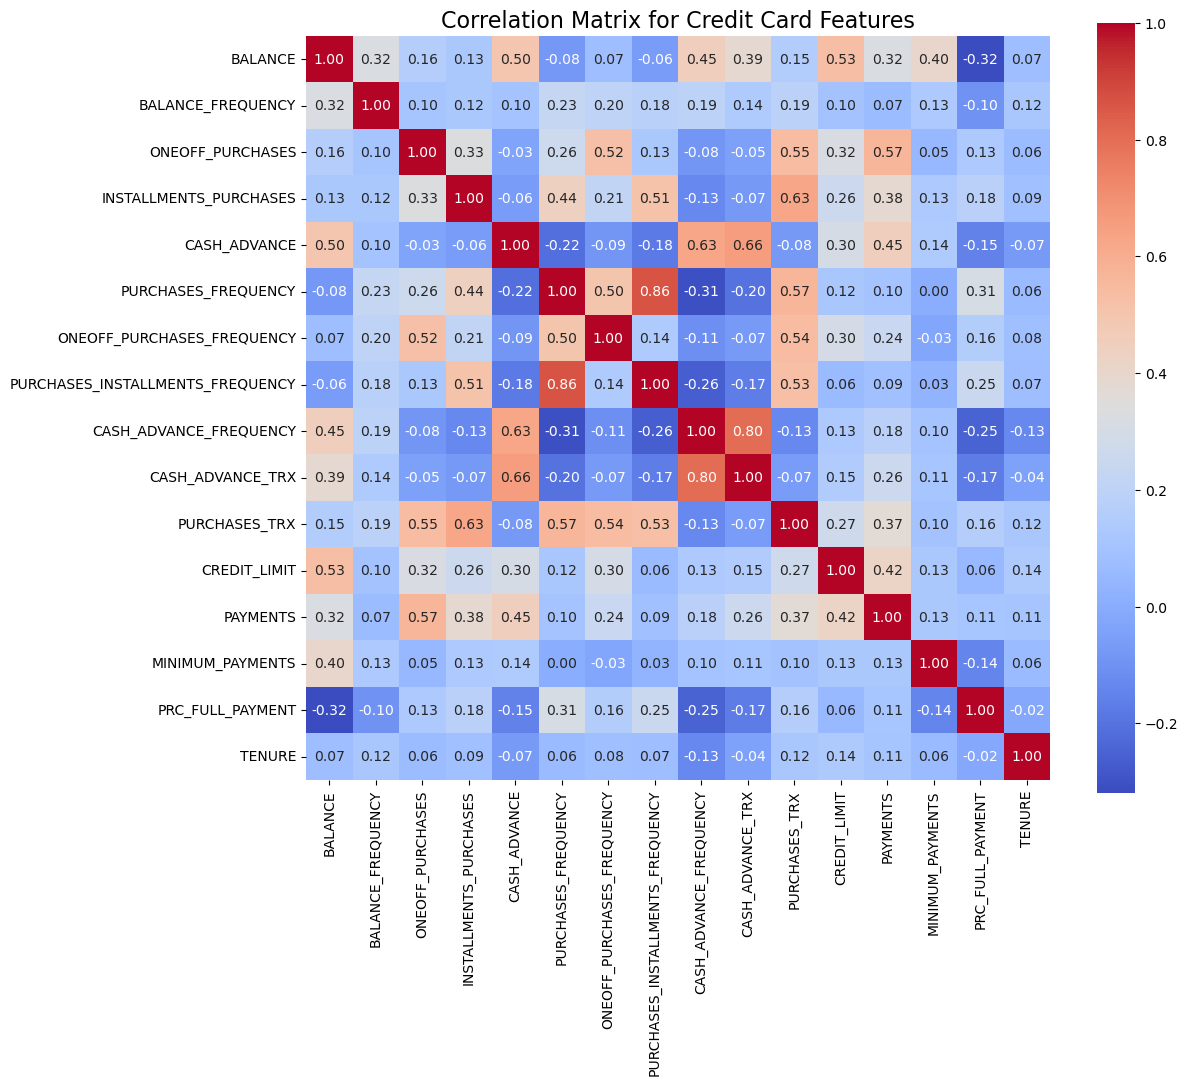

In [10]:
#Drop non-numeric columns
numeric_df = cc.drop(columns=['PURCHASES', 'CUST_ID'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for Credit Card Features', fontsize=16)

plt.show()

### Tree-Models

In [ ]:
random.seed(2024)
# Drop 'CUST_ID' and 'PURCHASES' (we'll predict 'PURCHASES')
X = cc.drop(columns=['PURCHASES', 'CUST_ID'])
y = cc['PURCHASES']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error (MSE): 267180.3627206359
Mean Absolute Error (MAE): 47.730701508379916
Mean Squared Error (MSE): 267180.3627206359
Mean Absolute Error (MAE): 47.730701508379916


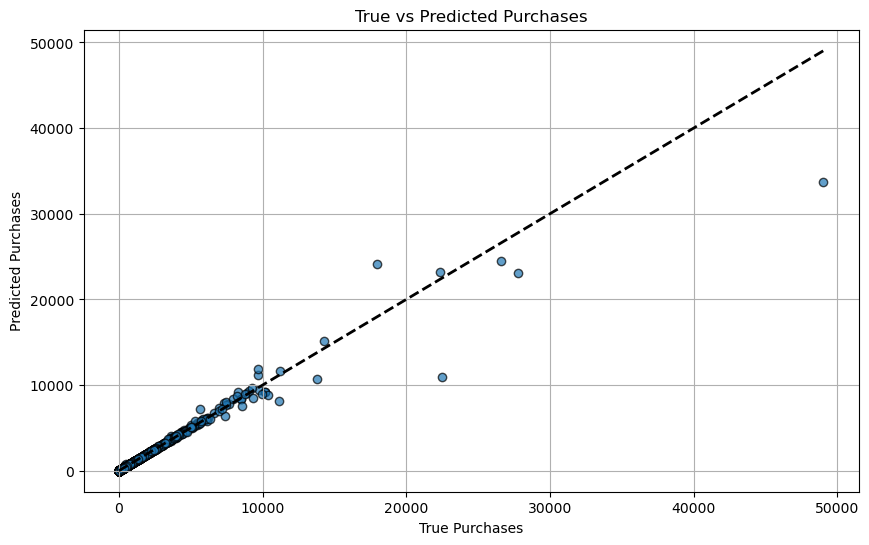

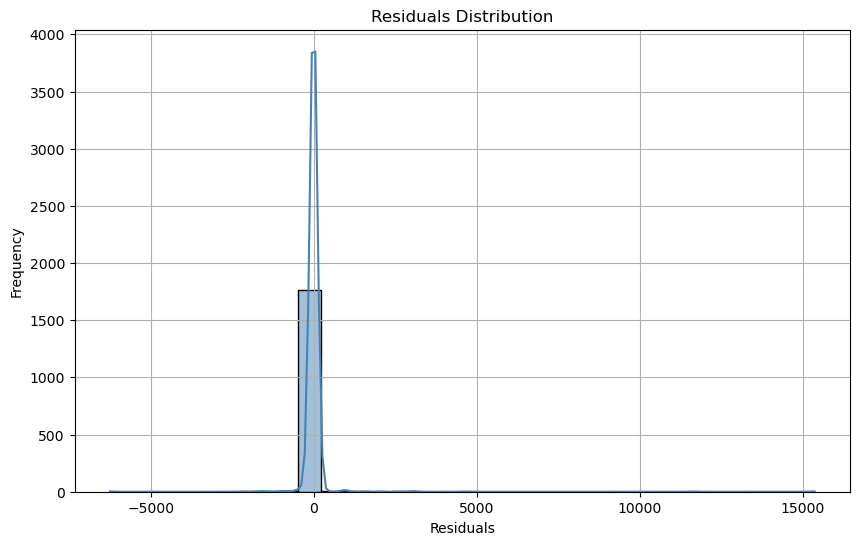

In [16]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot 1: True vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('True vs Predicted Purchases')
plt.xlabel('True Purchases')
plt.ylabel('Predicted Purchases')
plt.grid(True)
plt.show()

# Plot 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='steelblue', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

XGBoost Mean Squared Error (MSE): 383723.2367158016
XGBoost Mean Absolute Error (MAE): 58.86475522950866
XGBoost Mean Squared Error (MSE): 383723.2367158016
XGBoost Mean Absolute Error (MAE): 58.86475522950866


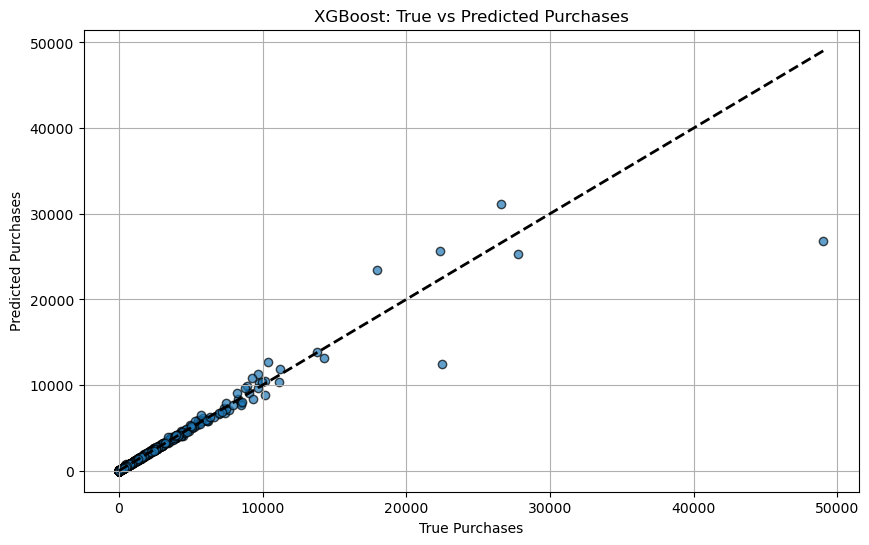

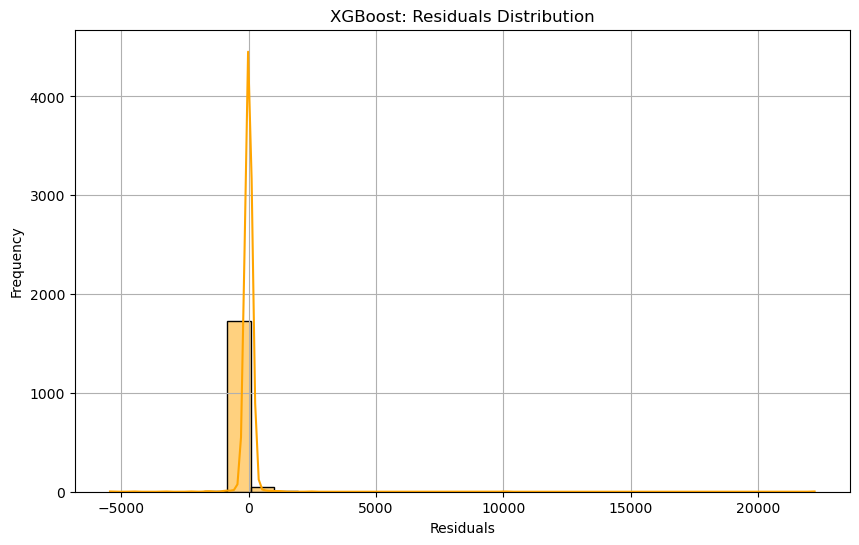

In [19]:
# Initialize XGBoost Regressor
xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate performance metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")

# Plot 1: True vs. Predicted Values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('XGBoost: True vs Predicted Purchases')
plt.xlabel('True Purchases')
plt.ylabel('Predicted Purchases')
plt.grid(True)
plt.show()

# Plot 2: Residual Plot for XGBoost
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='orange', bins=30)
plt.title('XGBoost: Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
metrics_data = {
    'Model': ['Random Forest', 'XGBoost'],
    'Mean Squared Error (MSE)': [mse, mse_xgb],
    'Mean Absolute Error (MAE)': [mae, mae_xgb]
}

metrics_df = pd.DataFrame(metrics_data)

print(metrics_df)

           Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)
0  Random Forest             267180.362721                  47.730702
1        XGBoost             383723.236716                  58.864755
           Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)
0  Random Forest             267180.362721                  47.730702
1        XGBoost             383723.236716                  58.864755


In [28]:
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

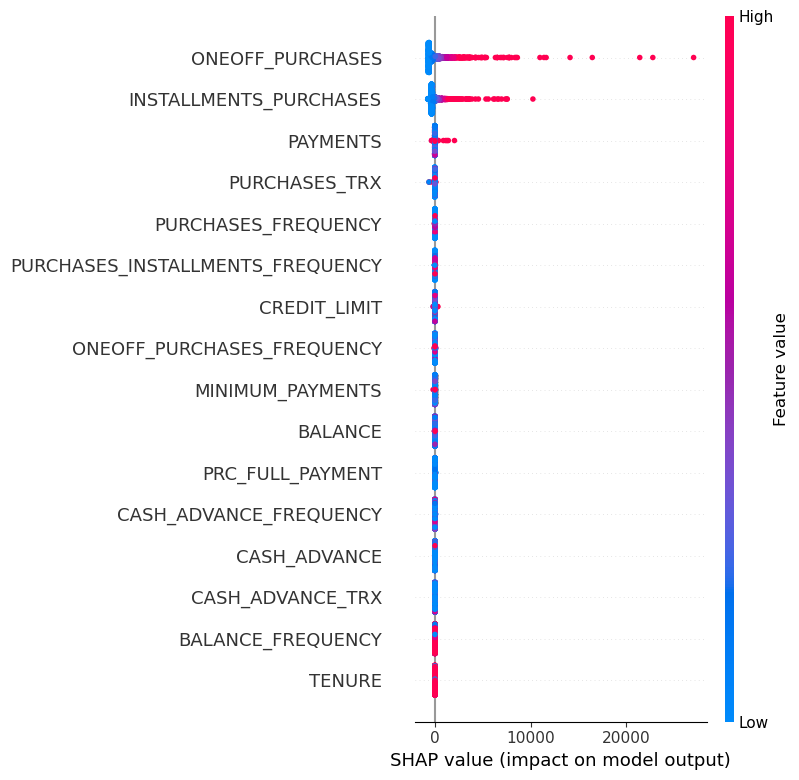

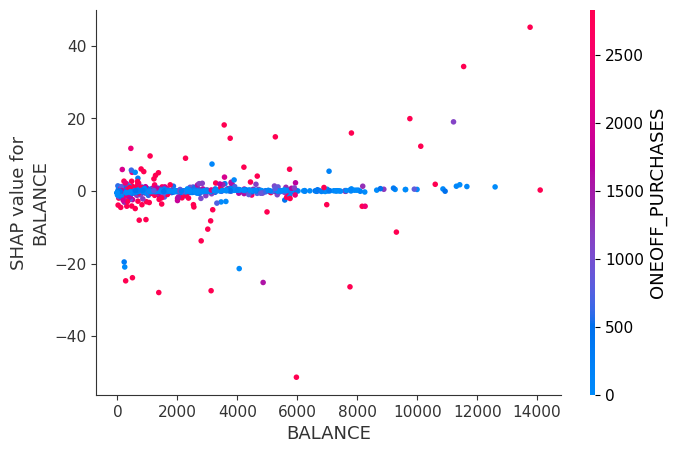

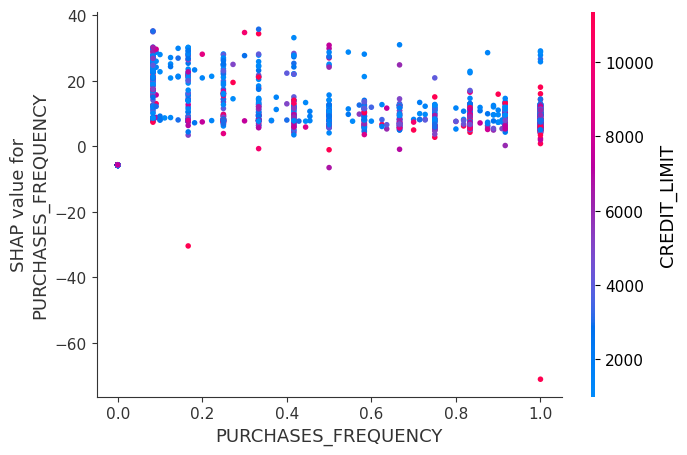

In [32]:
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Dependence Plot for BALANCE
shap.dependence_plot('BALANCE', shap_values, X_test)

# Interaction Plot for PURCHASES_FREQUENCY' and CREDIT_LIMIT
shap.dependence_plot('PURCHASES_FREQUENCY', shap_values, X_test, interaction_index='CREDIT_LIMIT')

# Pick a random case for the force plot
random_index = np.random.randint(0, X_test.shape[0])
shap.force_plot(explainer.expected_value, shap_values[random_index, :], X_test.iloc[random_index, :], feature_names=X.columns)
